In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df=pd.read_csv('incident_event_log.csv')

In [3]:
df.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


<b>Observation:</b>
Few columns contains '?', need to do more analysis if there are null/empty values or other types of values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

<b>Observation:</b>
There are no empty values, all cells have values.

<hr  style="height:1px;"/>

In [5]:
#https://stackoverflow.com/a/26937531/1225413
# https://cppsecrets.com/users/11871069710310910110111611510511010310456574611511664103109971051084699111109/Python-prettytable-tutorial-generates-tables-in-python-with-prettytables.php
from prettytable import PrettyTable
t = PrettyTable()
t.field_names = ["Column Name", "Unique Values"]
t.align["Column Name"] = "l"
for i in df.columns:
    t.add_row([i, df[i].nunique()])
print(t)

+-------------------------+---------------+
| Column Name             | Unique Values |
+-------------------------+---------------+
| number                  |     24918     |
| incident_state          |       9       |
| active                  |       2       |
| reassignment_count      |       28      |
| reopen_count            |       9       |
| sys_mod_count           |      115      |
| made_sla                |       2       |
| caller_id               |      5245     |
| opened_by               |      208      |
| opened_at               |     19849     |
| sys_created_by          |      186      |
| sys_created_at          |     11553     |
| sys_updated_by          |      846      |
| sys_updated_at          |     50664     |
| contact_type            |       5       |
| location                |      225      |
| category                |       59      |
| subcategory             |      255      |
| u_symptom               |      526      |
| cmdb_ci                 |     

In [6]:
# https://stackoverflow.com/a/52426772
print("Count for each column with ? value")
column_question_mark_value_count_series=df.isin(['?']).sum(axis=0)
column_question_mark_value_count_series

Count for each column with ? value


number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

<AxesSubplot:title={'center':'Plot showing count for each column with ? value'}>

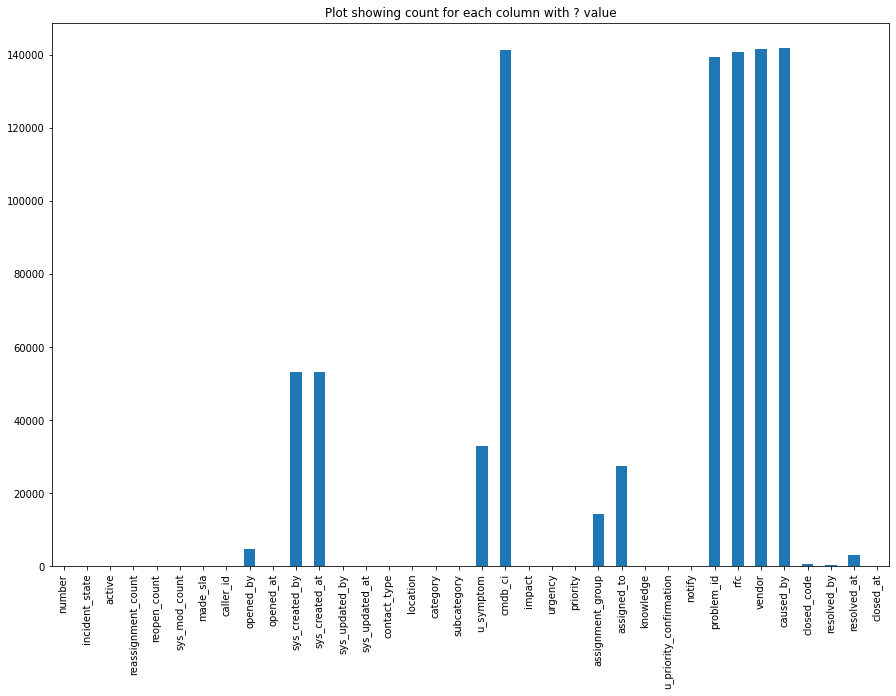

In [7]:
# https://stackoverflow.com/a/37514712
# https://www.geeksforgeeks.org/change-figure-size-in-pandas-python/
column_question_mark_value_count_series.plot.bar(figsize=(15, 10), title="Plot showing count for each column with ? value")

In [8]:
# Print the summary statistics
# https://pythontic.com/pandas/series-plotting/box%20plot
print("Statistics summary for each column with ? value")
print(column_question_mark_value_count_series.describe());

Statistics summary for each column with ? value
count        36.000000
mean      24849.916667
std       49212.887132
min           0.000000
25%           0.000000
50%          14.500000
75%       17533.750000
max      141689.000000
dtype: float64


In [9]:
column_question_mark_value_count_series[column_question_mark_value_count_series>50000]

sys_created_by     53076
sys_created_at     53076
cmdb_ci           141267
problem_id        139417
rfc               140721
vendor            141468
caused_by         141689
dtype: int64

<h3>Observation:</h3>

Above columns have majority of values with ?, which will be hard to impute. we need to remove this columns as they do not have much information and will not be helpful in building model.

<hr/>

In [10]:
# Removing 7 columns 
df_with_high_question_value_column_dropped = df.drop(['cmdb_ci','problem_id','rfc','vendor','caused_by', 'sys_created_by', 'sys_created_at'], axis=1)    
df_with_high_question_value_column_dropped.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


<hr  style="height:1px;"/>

[Text(0.5, 1.0, 'Plot showing distribution of closed category code')]

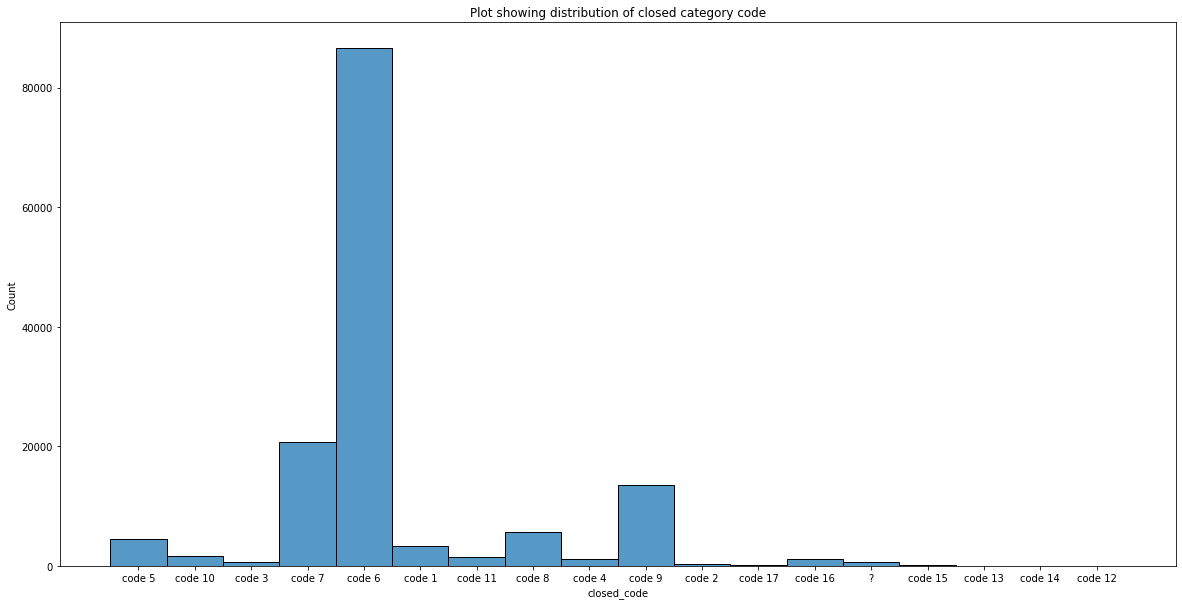

In [11]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g=sns.histplot(df_with_high_question_value_column_dropped, x='closed_code', ax=ax)
g.set(title="Plot showing distribution of closed category code")

<h3>Observation:</h3>

The dataset is highly imbalanced if <b>closed_code</b> is considered as most of the incidents close with <b>code 6</b>.

<hr  style="height:1px;"/>

In [12]:
df_with_high_question_value_column_dropped["active"].value_counts()

True     116726
False     24986
Name: active, dtype: int64

<h3>Observation:</h3>

Majority of the issues are in active state.

<hr  style="height:1px;"/>

In [13]:
incident_state_value_count=df_with_high_question_value_column_dropped["incident_state"].value_counts()

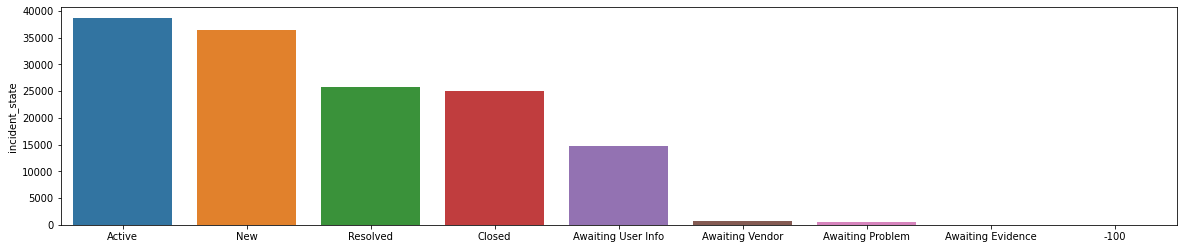

In [14]:
# https://stackoverflow.com/a/31460312
# https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
g=sns.barplot(x=df_with_high_question_value_column_dropped.incident_state.value_counts().index,
            y=df_with_high_question_value_column_dropped.incident_state.value_counts(), ax=ax, data=df_with_high_question_value_column_dropped)

In [15]:
df_with_high_question_value_column_dropped.loc[df_with_high_question_value_column_dropped["incident_state"] == "-100"]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
115641,INC0028089,-100,True,0,0,1,True,Caller 290,Opened by 305,10/5/2016 22:09,...,3 - Moderate,Group 64,Resolver 15,False,False,Do Not Notify,code 7,Resolved by 175,16/6/2016 13:02,21/6/2016 13:07
115642,INC0028089,-100,True,0,0,2,True,Caller 290,Opened by 305,10/5/2016 22:09,...,3 - Moderate,Group 64,Resolver 15,False,False,Do Not Notify,code 7,Resolved by 175,16/6/2016 13:02,21/6/2016 13:07
124507,INC0030413,-100,True,1,0,14,True,Caller 2950,Opened by 17,17/5/2016 14:42,...,3 - Moderate,Group 17,Resolver 77,False,False,Do Not Notify,code 7,Resolved by 70,21/6/2016 17:28,26/6/2016 18:00
124508,INC0030413,-100,True,1,0,15,True,Caller 2950,Opened by 17,17/5/2016 14:42,...,3 - Moderate,Group 17,Resolver 77,False,False,Do Not Notify,code 7,Resolved by 70,21/6/2016 17:28,26/6/2016 18:00
124509,INC0030413,-100,True,1,0,20,True,Caller 2950,Opened by 17,17/5/2016 14:42,...,3 - Moderate,Group 17,Resolver 77,False,False,Do Not Notify,code 7,Resolved by 70,21/6/2016 17:28,26/6/2016 18:00


<h3>Observation:</h3>

Only 2 incidents(by number),  have missing incident state.

<hr  style="height:1px;"/>

[Text(0.5, 1.0, 'Plot showing distribution of priority')]

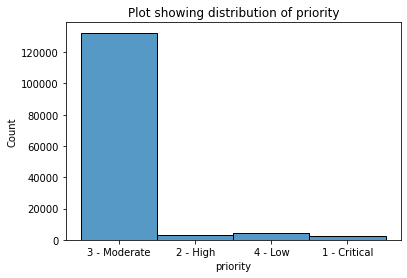

In [16]:
g=sns.histplot(df_with_high_question_value_column_dropped, x='priority')
g.set(title="Plot showing distribution of priority")

Most of the issues are in moderate priority.

<hr  style="height:1px;"/>

In [17]:
# https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6
reassignment_count=df_with_high_question_value_column_dropped["reassignment_count"].value_counts()

Text(0.5, 1.0, 'Distribution of number of times ticket have been reassigned')

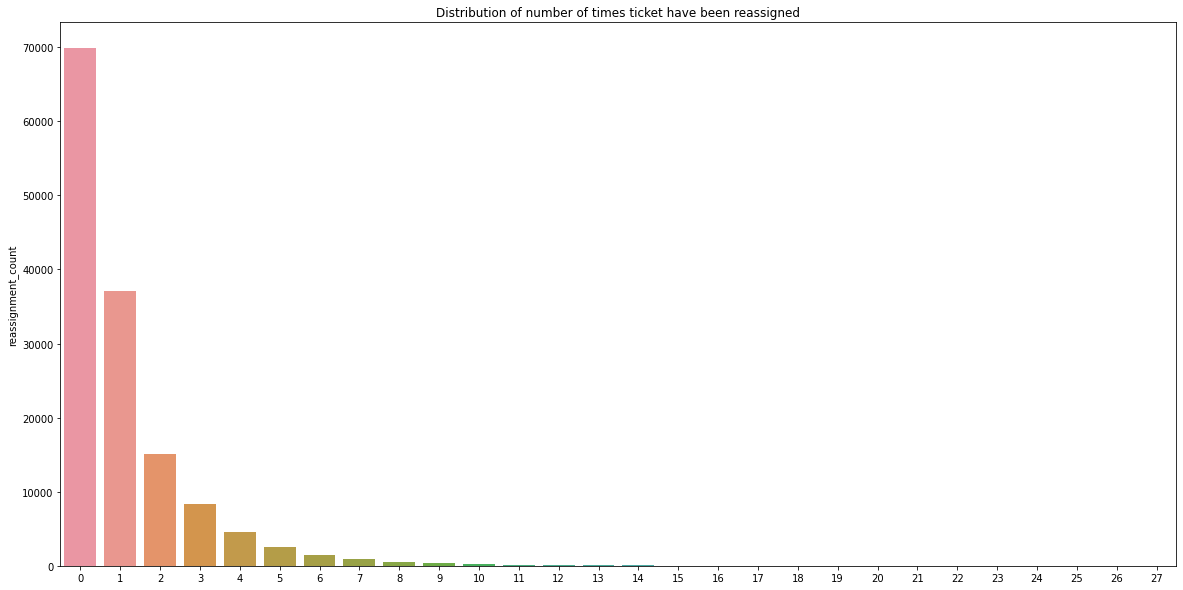

In [18]:
# https://stackoverflow.com/a/31460312
# https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g=sns.barplot(x=df_with_high_question_value_column_dropped.reassignment_count.value_counts().index,
            y=df_with_high_question_value_column_dropped.reassignment_count.value_counts(), ax=ax, data=df_with_high_question_value_column_dropped)
g.set_title("Distribution of number of times ticket have been reassigned")

In [19]:
reopen_count=df_with_high_question_value_column_dropped["reopen_count"].value_counts()
reopen_count

0    139398
1      1918
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: reopen_count, dtype: int64

Text(0.5, 1.0, 'Distribution of number of times ticket have been reopened')

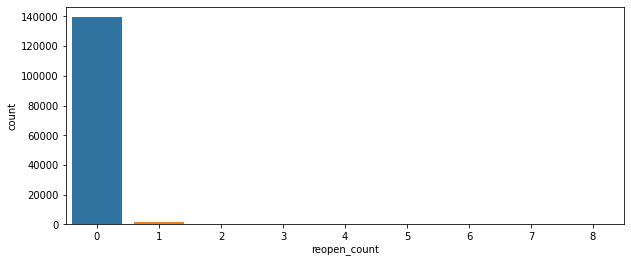

In [20]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='reopen_count', data=df_with_high_question_value_column_dropped, ax=ax)
g.set_title("Distribution of number of times ticket have been reopened")

In [21]:
df.groupby(['incident_state','priority'])['priority'].count()

incident_state      priority    
-100                3 - Moderate        5
Active              1 - Critical      706
                    2 - High          734
                    3 - Moderate    36235
                    4 - Low          1041
Awaiting Evidence   1 - Critical        3
                    2 - High            1
                    3 - Moderate       32
                    4 - Low             2
Awaiting Problem    1 - Critical       14
                    2 - High           27
                    3 - Moderate      378
                    4 - Low            42
Awaiting User Info  1 - Critical      157
                    2 - High          234
                    3 - Moderate    13721
                    4 - Low           530
Awaiting Vendor     1 - Critical       22
                    2 - High            5
                    3 - Moderate      676
                    4 - Low             4
Closed              1 - Critical      271
                    2 - High          408
 

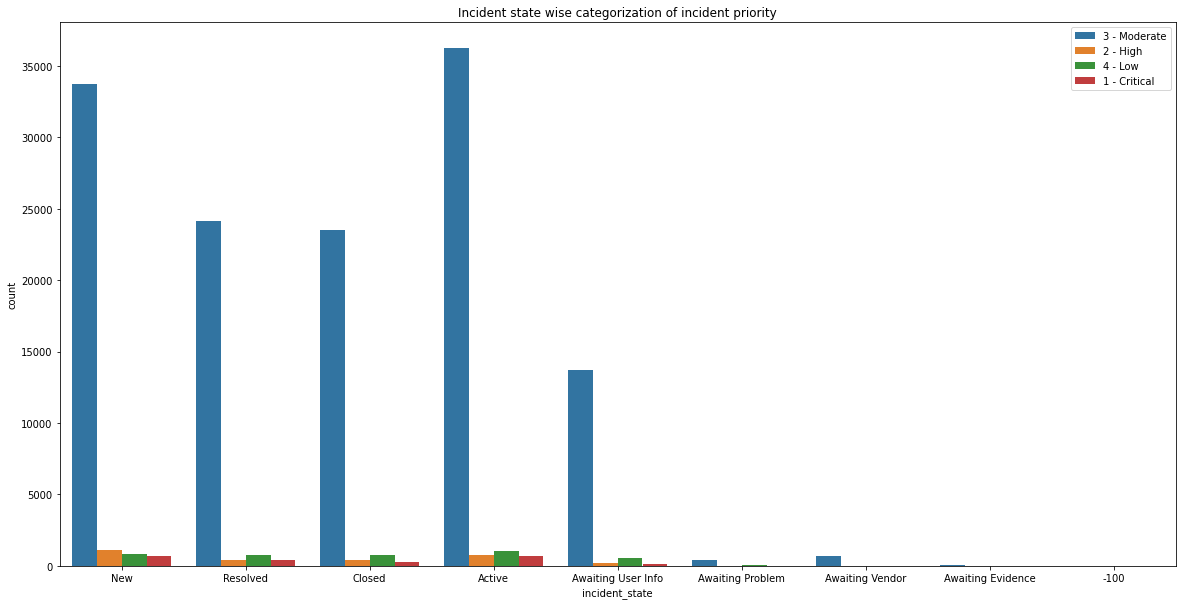

In [22]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
# https://stackoverflow.com/a/27084389/1225413
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

g=sns.countplot(x="incident_state", hue="priority", data=df_with_high_question_value_column_dropped, ax=ax)
g.set_title("Incident state wise categorization of incident priority")
plt.legend(loc='upper right')

In [23]:
df_with_high_question_value_column_dropped.groupby(['number']).count()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_updated_by,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
number,,,,,,,,,,,,,,,,,,,,,
INC0000045,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
INC0000047,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
INC0000057,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
INC0000060,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
INC0000062,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC0120304,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
INC0120319,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
INC0120495,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


<h3>Observation:</h3>
There are 24918 unique incident numbers/tickets in the dataset.

<hr  style="height:1px;"/>

Text(0.5, 1.0, 'Distribution of incident based on SLA')

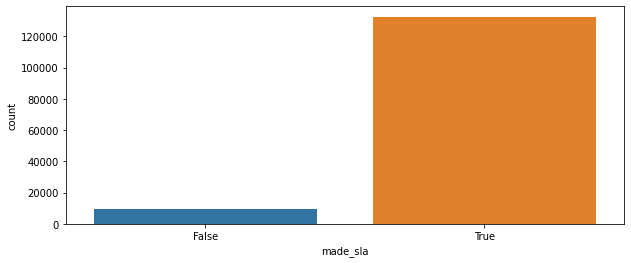

In [24]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='made_sla', data=df_with_high_question_value_column_dropped, ax=ax)
g.set_title("Distribution of incident based on SLA")

Text(0.5, 1.0, 'Distribution of incident based on type of communication')

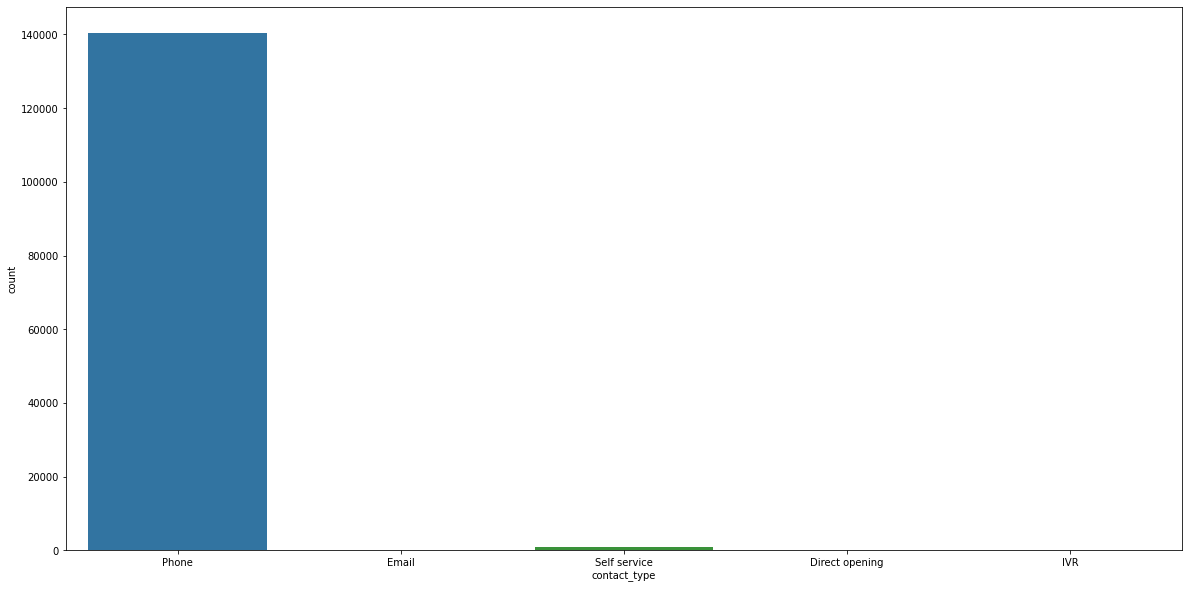

In [25]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='contact_type', data=df_with_high_question_value_column_dropped, ax=ax)
g.set_title("Distribution of incident based on type of communication")

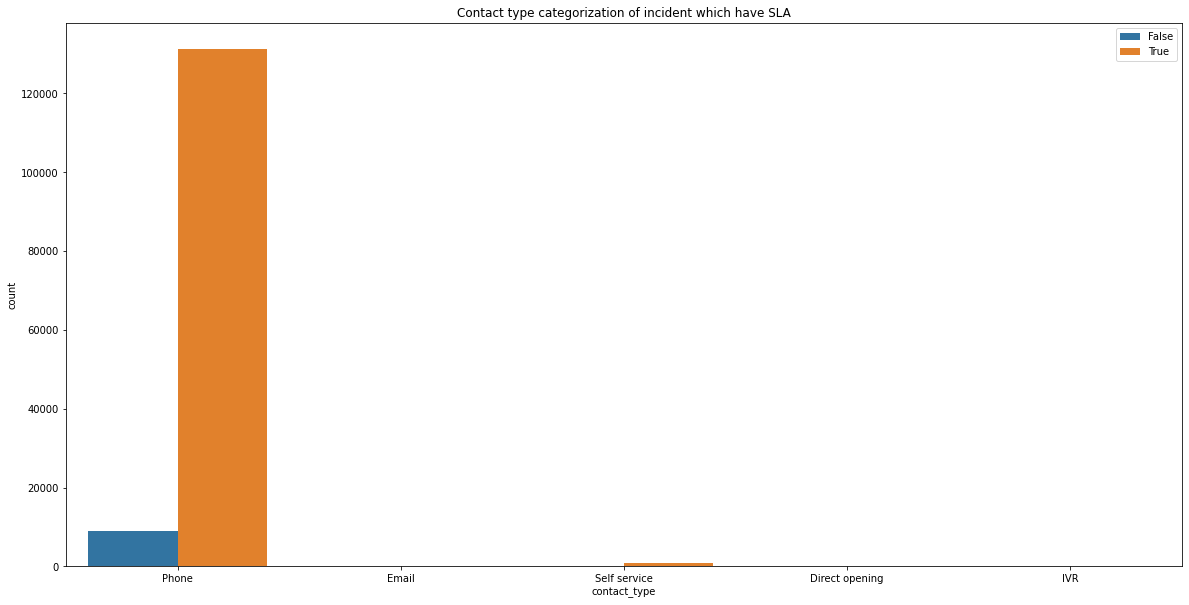

In [26]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
# https://stackoverflow.com/a/27084389/1225413
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

g=sns.countplot(x="contact_type", hue="made_sla", data=df_with_high_question_value_column_dropped, ax=ax)
g.set_title("Contact type categorization of incident which have SLA")
plt.legend(loc='upper right')

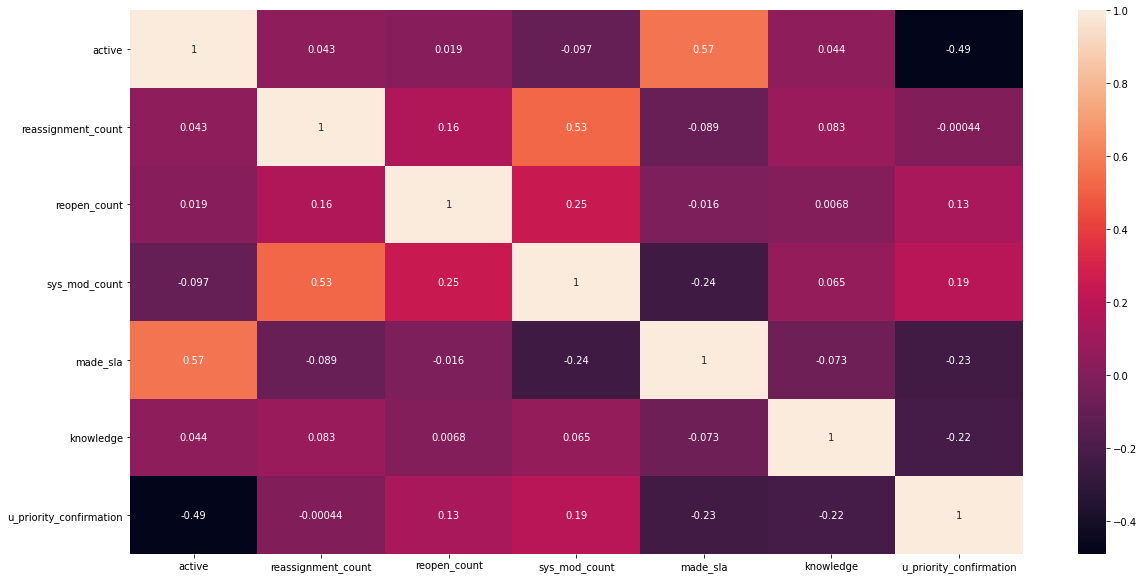

In [27]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df_with_high_question_value_column_dropped.corr(),annot = True)
plt.show()

<h3>Observation:</h3>

The above cor-relation does not help much, may be we can check correlation between features after feature engineering.

<hr  style="height:1px;"/>

In [28]:
df_with_high_question_value_column_dropped['opened_at'] = pd.to_datetime(df_with_high_question_value_column_dropped.opened_at)

In [29]:
df_with_high_question_value_column_dropped['opened_at'].describe()

c:\anaconda3\envs\tfg2.4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  141712
unique                  19849
top       2016-04-14 20:42:00
freq                       58
first     2016-01-03 01:22:00
last      2017-12-01 18:17:00
Name: opened_at, dtype: object

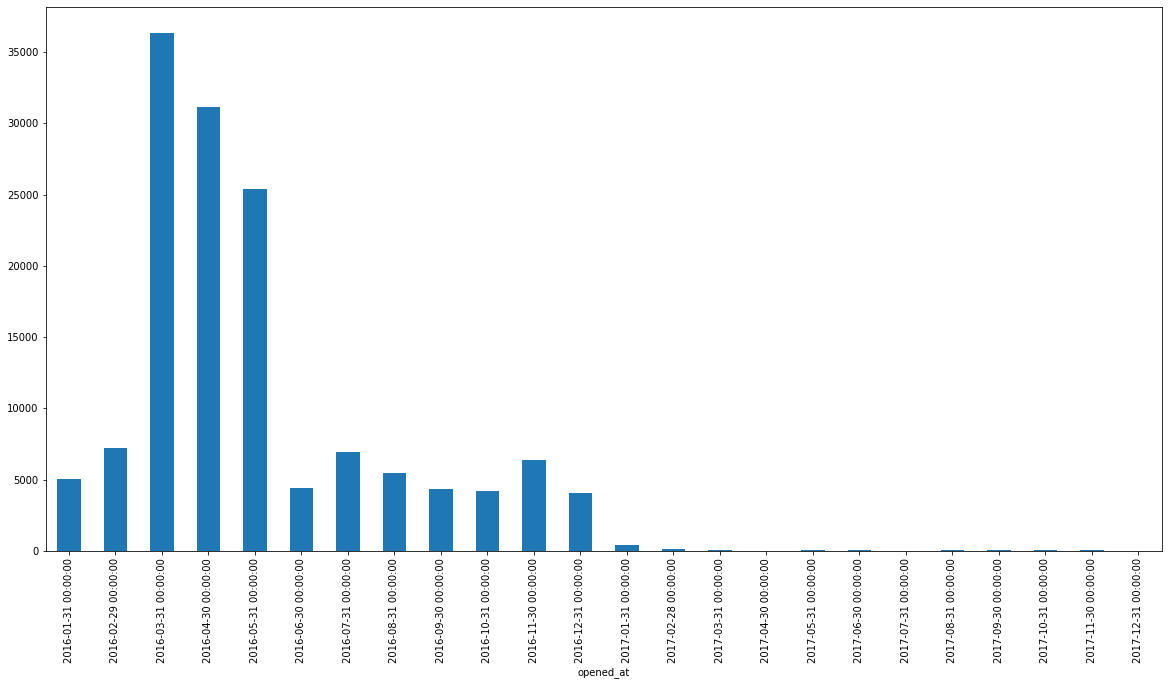

In [30]:
# https://stackoverflow.com/a/44908576/1225413
# https://stackoverflow.com/a/45299439/1225413

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
df_with_high_question_value_column_dropped.groupby(pd.Grouper(key='opened_at',freq='1M')).size().plot(kind='bar', ax=ax, rot=90)

plt.show()

<h3>Observation:</h3>

Most issues opened in the month of March.

<hr  style="height:1px;"/>

In [31]:
df_with_high_question_value_column_dropped['closed_at'] = pd.to_datetime(df_with_high_question_value_column_dropped.closed_at)

In [32]:
df_with_high_question_value_column_dropped['closed_at'].describe()

c:\anaconda3\envs\tfg2.4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  141712
unique                   2707
top       2016-03-24 18:59:00
freq                     3324
first     2016-01-04 00:59:00
last      2017-12-02 17:00:00
Name: closed_at, dtype: object

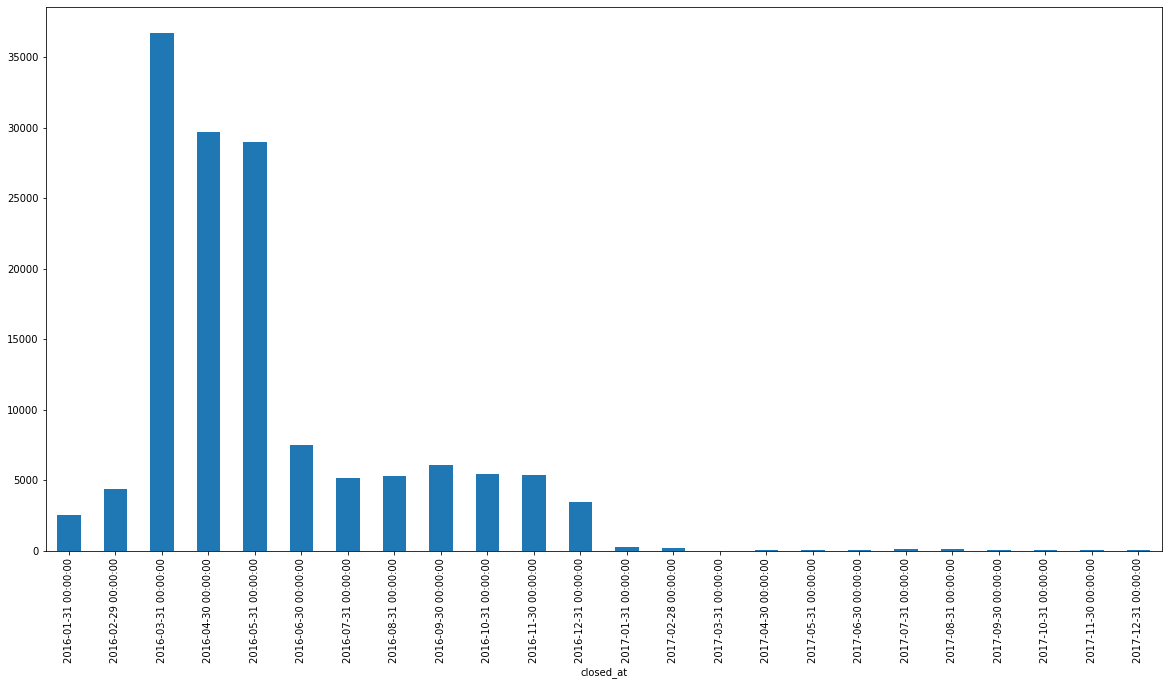

In [33]:
# https://stackoverflow.com/a/44908576/1225413
# https://stackoverflow.com/a/45299439/1225413

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
df_with_high_question_value_column_dropped.groupby(pd.Grouper(key='closed_at',freq='1M')).size().plot(kind='bar', ax=ax, rot=90)

plt.show()

<h3>Observation:</h3>
Most issues closed in the month of March.

<hr  style="height:1px;"/>

<h1>EDA on target variable</h1>

In [34]:
date_format='%d/%m/%Y %H:%M'
df['opened_at'] = pd.to_datetime(df.opened_at, format=date_format)
df['sys_updated_at'] = pd.to_datetime(df.sys_updated_at, format=date_format)
df['closed_at'] = pd.to_datetime(df.closed_at, format=date_format)

In [36]:
# https://stackoverflow.com/a/46966942/1225413
df['time_taken_to_complete'] = (df['closed_at'] - df['opened_at'])/ pd.Timedelta(hours=1)

array([[<AxesSubplot:title={'center':'time_taken_to_complete'}>]],
      dtype=object)

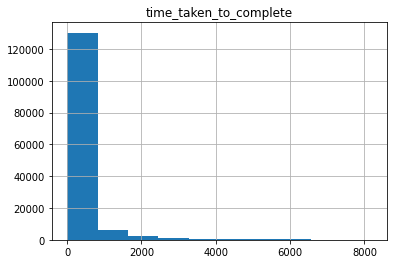

In [65]:
df.hist(column='time_taken_to_complete')

In [42]:
df['time_taken_to_complete'].describe()

count    141712.000000
mean        409.492242
std         651.752572
min           0.000000
25%         125.116667
50%         224.966667
75%         417.750000
max        8190.616667
Name: time_taken_to_complete, dtype: float64

In [64]:
print("90th Percentile of 'time taken to complete'\t:",np.percentile(df["time_taken_to_complete"],90))

90th Percentile of 'time taken to complete'	: 696.4


array([[<AxesSubplot:title={'center':'time_taken_to_complete'}>]],
      dtype=object)

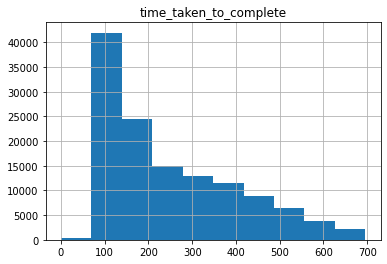

In [60]:
df.loc[df["time_taken_to_complete"] < 696].hist(column='time_taken_to_complete')

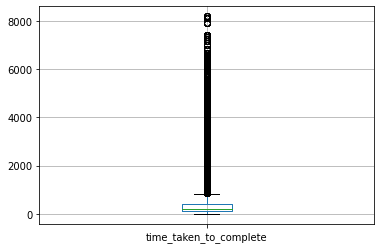

In [48]:
df.boxplot(column=['time_taken_to_complete'], return_type='axes');

c:\anaconda3\envs\tfg2.4\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


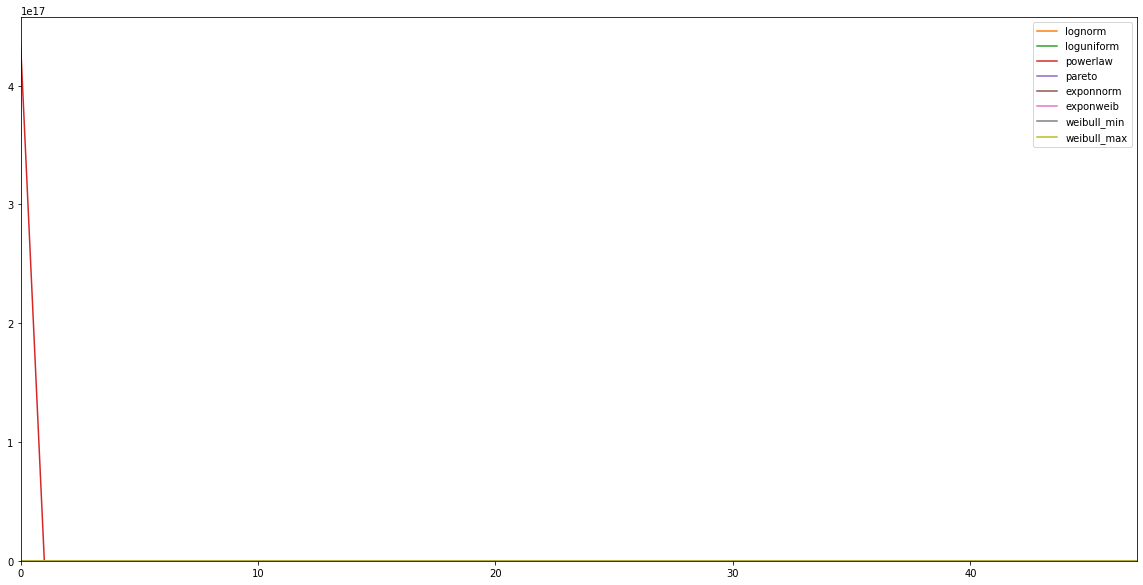

In [77]:
import scipy
import scipy.stats

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

size = 30000
x = np.arange(size)
y = scipy.int_(df["time_taken_to_complete"])
h = plt.hist(y, bins=range(48))

dist_names = ['lognorm','loguniform','powerlaw',
              'pareto','exponnorm','exponweib','weibull_min','weibull_max']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()

In [78]:
# https://gist.github.com/samread81/df69fc0f269eaefe59275fd4bd4cddd7#file-code-py
dist_names = ['weibull_min','weibull_max','powernorm','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','powerlognorm','powerlaw']

chi_square_statistics = []
# 11 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,11)
percentile_cutoffs = np.percentile(df['time_taken_to_complete'], percentile_bins)
observed_frequency, bins = (np.histogram(df['time_taken_to_complete'], bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(df['time_taken_to_complete'])
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by Betterment of fit:')
print ('............................................')
print (results)

(0.9887420489429364, -2.337748371182281e-23, 407.3729426897951)

(0.09584241170145207, 8190.616666666668, 1.7379518906654259)

(2.2194344999903782e-05, -397.9741763942445, 3.460442539345132)



c:\anaconda3\envs\tfg2.4\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\anaconda3\envs\tfg2.4\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(2.3059426605089826, 3064897814760.32, -1.183687250367858, 441657585853148.44)

(0.9554997810480659, -9.14654995210521, 438.1359324085143)

(0.0, 8190.616666666667)

(1.256272471886518, -0.02508533003225465, 325.9780111143772)

(0.0, 409.4922417767491)

(0.8055355614517996, -2.4715411104779204, 265.18673686889736)

(0.062010052420549897, 0.2505207428683537, -17.425333847569522, 96.77883117579519)

(0.28489580347985466, -1.4700569656693703e-21, 8323.646467807226)


Distributions listed by Betterment of fit:
............................................
    Distribution     chi_square
0    weibull_min  499640.818179
8        lognorm  500318.139889
7          expon  500829.508612
9   powerlognorm  502629.490173
3           beta  508658.618159
4       invgauss  509538.852345
6          gamma  513358.363780
10      powerlaw  545949.131366
5        uniform  706438.775323
1    weibull_max  733326.230986
2      powernorm  779211.000000


<hr  style="height:1px;"/>

<h1>Final Observations:</h1>


<ol>
    <li>Dataset is highly imblanaced if we consider feature such as reopen_count, priority.</li>
    <li>Most of the closed code belongs to code 6.</li>
    <li>Many features have missing values, i.e., have ? value in them.</li>
    <li>Since their are various kinds of features, we have to pre-process each one differently.</li>
</ol>